# loading the dataset

In [1]:
# Load dataset
import pandas as pd
file_link = 'https://drive.google.com/file/d/1dtRKJuKtyhWD715R4pTALh5Fi5MIK9fg/view?usp=sharing'
file_id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={file_id}'
dataset = pd.read_csv(new_link)
print(dataset.head(3))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0           0.0            1.0           never  25.19   
1  Female   NaN           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          NaN                158.0       0.0  


# numerical and categorical feature separation

In [2]:
# Get numerical features
numerical_features = dataset.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:\n')
print(numerical_features)

# get categorical features
categorical_features = dataset.select_dtypes(include='object').columns.tolist()
print(f'\nThere are {len(categorical_features)} categorical features:\n')
print(categorical_features)


There are 7 numerical features:

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

There are 2 categorical features:

['gender', 'smoking_history']


# empty string handling

In [3]:
# Replace all empty strings with NaN
import numpy as np
dataset.replace('', np.nan, inplace=True)
print(dataset.head(100))

    gender   age  hypertension  heart_disease smoking_history    bmi  \
0   Female  80.0           0.0            1.0           never  25.19   
1   Female   NaN           0.0            0.0         No Info  27.32   
2     Male  28.0           0.0            0.0           never  27.32   
3   Female  36.0           0.0            0.0             NaN  23.45   
4     Male  76.0           1.0            1.0         current  20.14   
..     ...   ...           ...            ...             ...    ...   
95    Male  19.0           0.0            0.0           never  27.32   
96     NaN  67.0           0.0            0.0           never  27.32   
97    Male  11.0           0.0            0.0         No Info  27.32   
98  Female   NaN           0.0            0.0         No Info  50.13   
99    Male   NaN           0.0            0.0         current  27.32   

    HbA1c_level  blood_glucose_level  diabetes  
0           6.6                140.0       0.0  
1           6.6                 80.0 

# numerical null value handling

In [4]:
#counting numerical null values
null_counts = dataset[numerical_features].isnull().sum()
print(null_counts)

age                    10065
hypertension           10148
heart_disease           9919
bmi                     9944
HbA1c_level            10139
blood_glucose_level     9880
diabetes               10082
dtype: int64


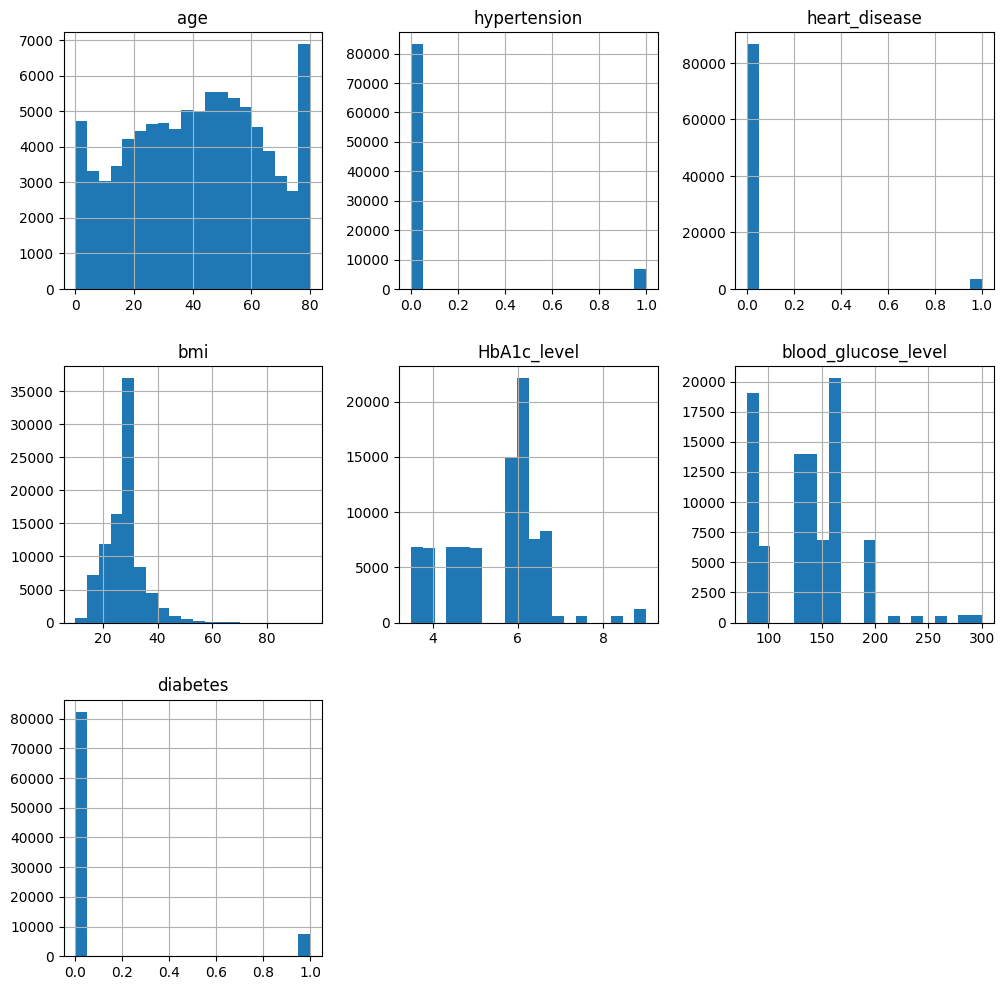

In [5]:
#finding outliers
import matplotlib.pyplot as plt
dataset[numerical_features].hist(figsize=(12, 12), bins=20)
plt.show()


In [6]:
# handling numerical null values
dataset[numerical_features] = dataset[numerical_features].fillna(dataset[numerical_features].median())
print(dataset.head(3))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0           0.0            1.0           never  25.19   
1  Female  43.0           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.8                158.0       0.0  


# categorical null value handling

In [7]:
# counting categorical null values
counts=dataset[categorical_features].isnull().sum()
print(counts)

gender             9835
smoking_history    9988
dtype: int64


In [8]:
# handling categorical null values
for col in categorical_features:
    mode_value = dataset[col].mode()[0]
    dataset[col] = dataset[col].fillna(mode_value)
print(dataset.head(3))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0           0.0            1.0           never  25.19   
1  Female  43.0           0.0            0.0         No Info  27.32   
2    Male  28.0           0.0            0.0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                140.0       0.0  
1          6.6                 80.0       0.0  
2          5.8                158.0       0.0  


# correlation analysis

In [9]:
#correlation matrix
import seaborn as sns
correlation_matrix = dataset[numerical_features].corr()
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.224787       0.209713  0.305123   
hypertension         0.224787      1.000000       0.109697  0.133746   
heart_disease        0.209713      0.109697       1.000000  0.054053   
bmi                  0.305123      0.133746       0.054053  1.000000   
HbA1c_level          0.091201      0.072389       0.057009  0.077540   
blood_glucose_level  0.100028      0.073470       0.062706  0.078959   
diabetes             0.231667      0.176157       0.153511  0.192055   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.091201             0.100028  0.231667  
hypertension            0.072389             0.073470  0.176157  
heart_disease           0.057009             0.062706  0.153511  
bmi                     0.077540             0.078959  0.192055  
HbA1c_level             1.000000             0.149540  0.356945  
blood_glucose_level     0.1

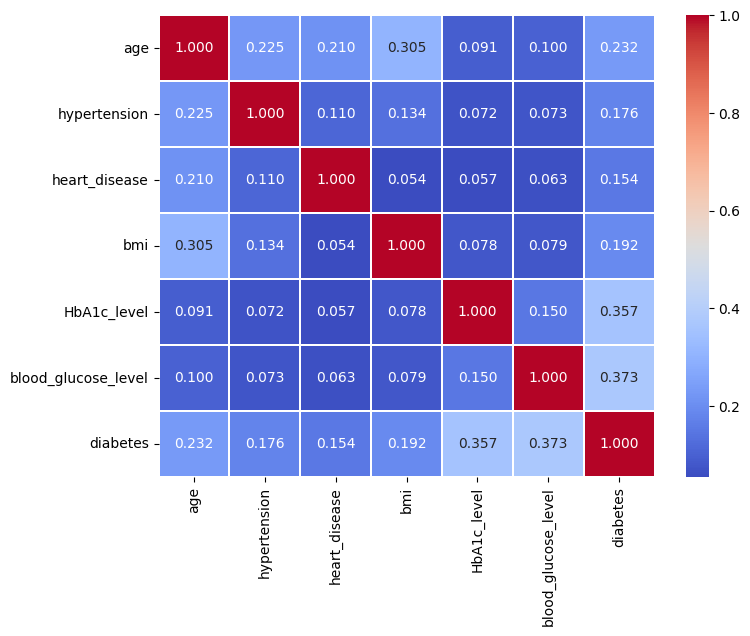

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

# label imbalance checking

In [11]:
#check Imbalance in label
class_counts=dataset.groupby("diabetes").size()
columns=['diabetes','count','percentage']
outcome=[0,1]
count=list()
percentage=list()
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,diabetes,count,percentage
0,0,92366,87.967619
1,1,7634,7.270476


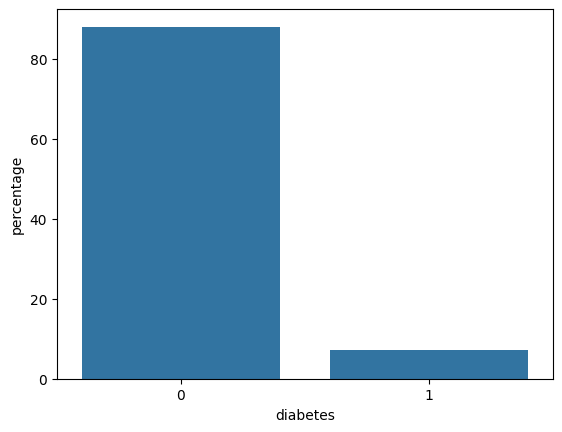

In [12]:
sns.barplot(data=imbalance_df,x=imbalance_df['diabetes'],y=imbalance_df['percentage'])
plt.show()

# categorical encoding

In [13]:
#converting categorical columns into numerical
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(dataset[categorical_features])
encoded_col_names = encoder.get_feature_names_out(categorical_features)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_col_names)
data_final = pd.concat([dataset.drop(categorical_features, axis=1), encoded_df], axis=1)
print(data_final.head(3))

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0           0.0            1.0  25.19          6.6                140.0   
1  43.0           0.0            0.0  27.32          6.6                 80.0   
2  28.0           0.0            0.0  27.32          5.8                158.0   

   diabetes  gender_Male  gender_Other  smoking_history_current  \
0       0.0          0.0           0.0                      0.0   
1       0.0          0.0           0.0                      0.0   
2       0.0          1.0           0.0                      0.0   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                   0.0                     0.0                    1.0   
1                   0.0                     0.0                    0.0   
2                   0.0                     0.0                    1.0   

   smoking_history_not current  
0                          0.0  
1                          0.0  
2         

#feature scalling

In [14]:
# standard scaler(z-score)
# X_scaled= (X−mean)/ std
from sklearn.preprocessing import StandardScaler
# Filter only the numerical columns that are not binary
num_to_scale = [col for col in numerical_features if dataset[col].nunique() > 2]
scaler = StandardScaler()
data_final[num_to_scale] = scaler.fit_transform(data_final[num_to_scale])
print(data_final.head(3))


        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.779245           0.0            1.0 -0.337160     1.025513   
1  0.045902           0.0            0.0  0.001174     1.025513   
2 -0.656805           0.0            0.0  0.001174     0.239759   

   blood_glucose_level  diabetes  gender_Male  gender_Other  \
0             0.046886       0.0          0.0           0.0   
1            -1.510024       0.0          0.0           0.0   
2             0.513959       0.0          1.0           0.0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0   
2                      0.0                   0.0                     0.0   

   smoking_history_never  smoking_history_not current  
0                    1.0                          0.0  
1                    0.0                          0.0  
2    

# train-test split

In [15]:
# Split the data
X = data_final.drop('diabetes', axis=1)  # Features
y = data_final['diabetes']               # Target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (70000, 13)
X_test shape: (30000, 13)
y_train shape: (70000,)
y_test shape: (30000,)


In [16]:
# Split the data
X = data_final.drop('diabetes', axis=1)  # Features
y = data_final['diabetes']               # Target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42,stratify=y
)

# Apply SMOTE(handling imbalance on label column)
from collections import Counter
from imblearn.over_sampling import SMOTE
print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0.0: 64656, 1.0: 5344})
After SMOTE: Counter({0.0: 64656, 1.0: 64656})


#logistic regression

In [17]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

# 1. Create the Logistic Regression model
log_model = LogisticRegression(random_state=42, max_iter=100)
# 2. Train the model
log_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = log_model.predict(X_test)

# 4. Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
class_report_lr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("\nPrecision:", precision_lr)
print("\nRecall:", recall_lr)
print("\nConfusion Matrix:\n", conf_matrix_lr)
print("\nClassification Report:\n", class_report_lr)

Accuracy: 0.9537

Precision: 0.8113337940566689

Recall: 0.5126637554585153

Confusion Matrix:
 [[27437   273]
 [ 1116  1174]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27710
         1.0       0.81      0.51      0.63      2290

    accuracy                           0.95     30000
   macro avg       0.89      0.75      0.80     30000
weighted avg       0.95      0.95      0.95     30000



#random forest

In [18]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

# 1. Create the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    random_state=42
)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
conf_matrix_rf = confusion_matrix(y_test, y_pred)
class_report_rf = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("\nPrecision:", precision_rf)
print("Recall:", recall_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


Accuracy: 0.9631333333333333

Precision: 0.8453908984830805
Recall: 0.6327510917030568

Confusion Matrix:
 [[27445   265]
 [  841  1449]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27710
         1.0       0.85      0.63      0.72      2290

    accuracy                           0.96     30000
   macro avg       0.91      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000



#neural network

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

# Split features and target
X = data_final.drop('diabetes', axis=1)
y = data_final['diabetes']

# Neural network model
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X, y, epochs=10, batch_size=8, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy*100:.2f}%')

# Predictions (threshold at 0.5)
y_pred_probs = model.predict(X)
y_pred = (y_pred_probs > 0.5).astype(int)

# Metrics
accuracy_nn = accuracy_score(y, y_pred)
precision_nn = precision_score(y, y_pred)
recall_nn = recall_score(y, y_pred)
conf_matrix_nn = confusion_matrix(y, y_pred)
class_report_nn = classification_report(y, y_pred)

# Print results
print("Accuracy:", accuracy_nn)
print("\nPrecision:", precision_nn)
print("Recall:", recall_nn)
print("\nConfusion Matrix:\n", conf_matrix_nn)
print("\nClassification Report:\n", class_report_nn)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9443 - loss: 0.1755 - val_accuracy: 0.9560 - val_loss: 0.1279
Epoch 2/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9575 - loss: 0.1234 - val_accuracy: 0.9590 - val_loss: 0.1205
Epoch 3/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9590 - loss: 0.1176 - val_accuracy: 0.9592 - val_loss: 0.1172
Epoch 4/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9601 - loss: 0.1164 - val_accuracy: 0.9625 - val_loss: 0.1152
Epoch 5/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9630 - loss: 0.1137 - val_accuracy: 0.9610 - val_loss: 0.1141
Epoch 6/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9622 - loss: 0.1147 - val_accuracy: 0.9621 - val_loss: 0.1125
Epoch 7/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9636 - loss: 0.1113 - val_accuracy: 0.9639 - val_loss: 0.1114
Epoch 8/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.9642 - lo

#k-means clustering

In [20]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import numpy as np

# 1. Create the K-Means model
kmeans = KMeans(
    n_clusters=2,  # Since diabetes is binary: 0 or 1
    random_state=42
)

# 2. Fit the model on the features (ignore y)
kmeans.fit(X_train)

# 3. Get cluster labels
cluster_labels = kmeans.predict(X_test)

# 4. Map clusters to actual classes (optional, since K-Means labels are arbitrary)
# This step ensures cluster 0 corresponds to class 0 and cluster 1 to class 1
mapping = {}
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    mapped_class = y_test[mask].mode()[0]
    mapping[cluster] = mapped_class
mapped_labels = np.array([mapping[label] for label in cluster_labels])

# 5. Evaluate the clustering
accuracy_ul = accuracy_score(y_test, mapped_labels)
precision_ul = precision_score(y_test, mapped_labels)
recall_ul = recall_score(y_test, mapped_labels)
conf_matrix_ul = confusion_matrix(y_test, mapped_labels)
class_report_ul = classification_report(y_test, mapped_labels)

print("\nAccuracy:\n", accuracy_ul)
print("\nPrecision:\n", precision_ul)
print("\nRecall:\n", recall_ul)
print("\nConfusion Matrix:\n", conf_matrix_ul)
print("\nClassification Report:\n", class_report_ul)




Accuracy:
 0.9236666666666666

Precision:
 0.0

Recall:
 0.0

Confusion Matrix:
 [[27710     0]
 [ 2290     0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     27710
         1.0       0.00      0.00      0.00      2290

    accuracy                           0.92     30000
   macro avg       0.46      0.50      0.48     30000
weighted avg       0.85      0.92      0.89     30000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [21]:
# precision = 0.0 (no true positives predicted)
# recall = 0.0 (no actual positives detected)


# poc and auc comparison

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step


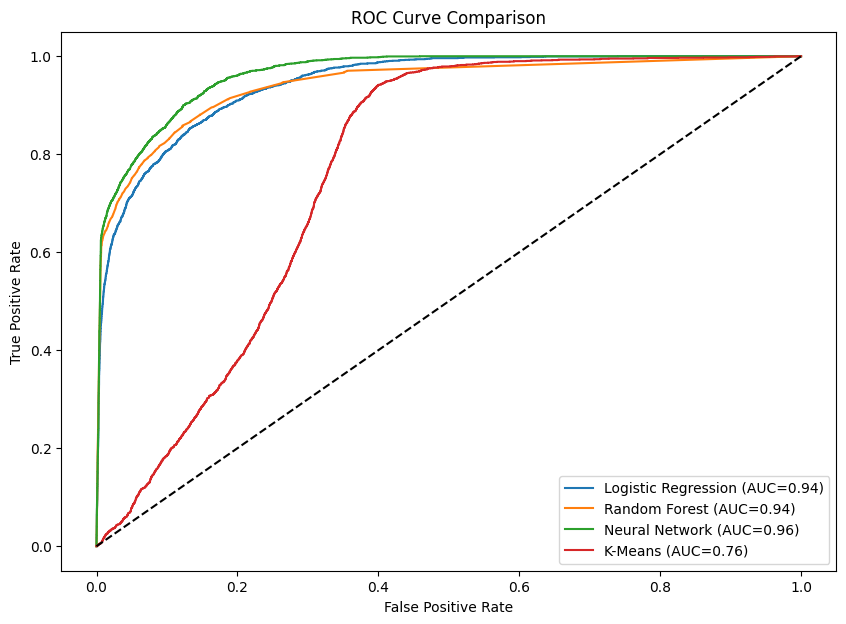

Logistic Regression AUC: 0.9444
Random Forest AUC: 0.9422
Neural Network AUC: 0.9639
K-Means AUC: 0.7635


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- Logistic Regression ---
y_prob_log = log_model.predict_proba(X_test)[:, 1]  # probability of class 1
auc_log = roc_auc_score(y_test, y_prob_log)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

# --- Random Forest ---
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# --- Neural Network ---
y_prob_nn = model.predict(X_test).ravel()  # Keras outputs probabilities
auc_nn = roc_auc_score(y_test, y_prob_nn)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)

# --- K-Means ---
# Use distance to cluster center as pseudo-probability
distances = kmeans.transform(X_test)
# Assign probability to cluster 1 as closer distance to cluster 1 center
y_prob_km = distances[:, 1] / distances.sum(axis=1)
auc_km = roc_auc_score(y_test, y_prob_km)
fpr_km, tpr_km, _ = roc_curve(y_test, y_prob_km)

# --- Plot ROC curves ---
plt.figure(figsize=(10,7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC={auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC={auc_nn:.2f})')
plt.plot(fpr_km, tpr_km, label=f'K-Means (AUC={auc_km:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# --- Print AUC values for comparison ---
print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"Neural Network AUC: {auc_nn:.4f}")
print(f"K-Means AUC: {auc_km:.4f}")


#accuracy comparison

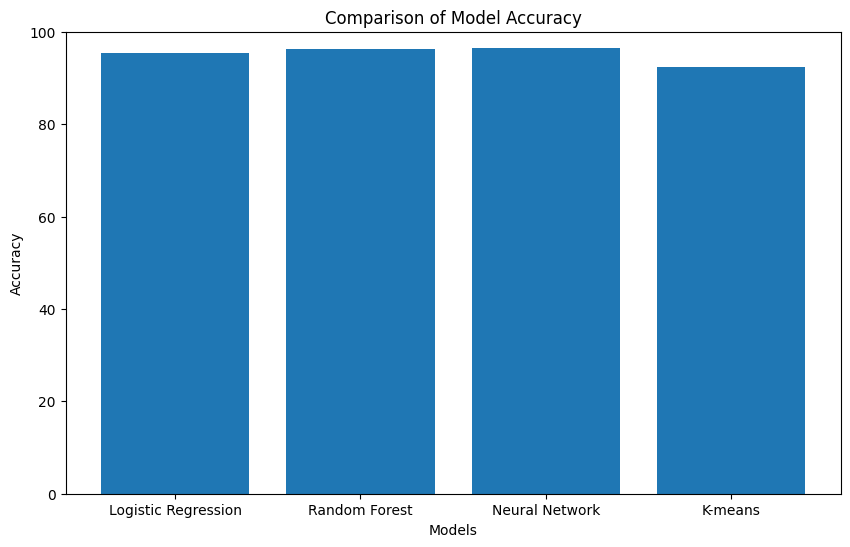

In [23]:

model_names = ['Logistic Regression', 'Random Forest', 'Neural Network', 'K-means']
accuracy_scores = [accuracy_lr,accuracy_rf,accuracy_nn,accuracy_ul]
accuracy_score_with_100 = []
for i in range(len(accuracy_scores)):
    accuracy_score_with_100.append(accuracy_scores[i]*100)

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_score_with_100)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracy")
plt.ylim(0, 100)  # Set y-axis limit to 0-1 for accuracy
plt.show()

#confusion matrix comparison

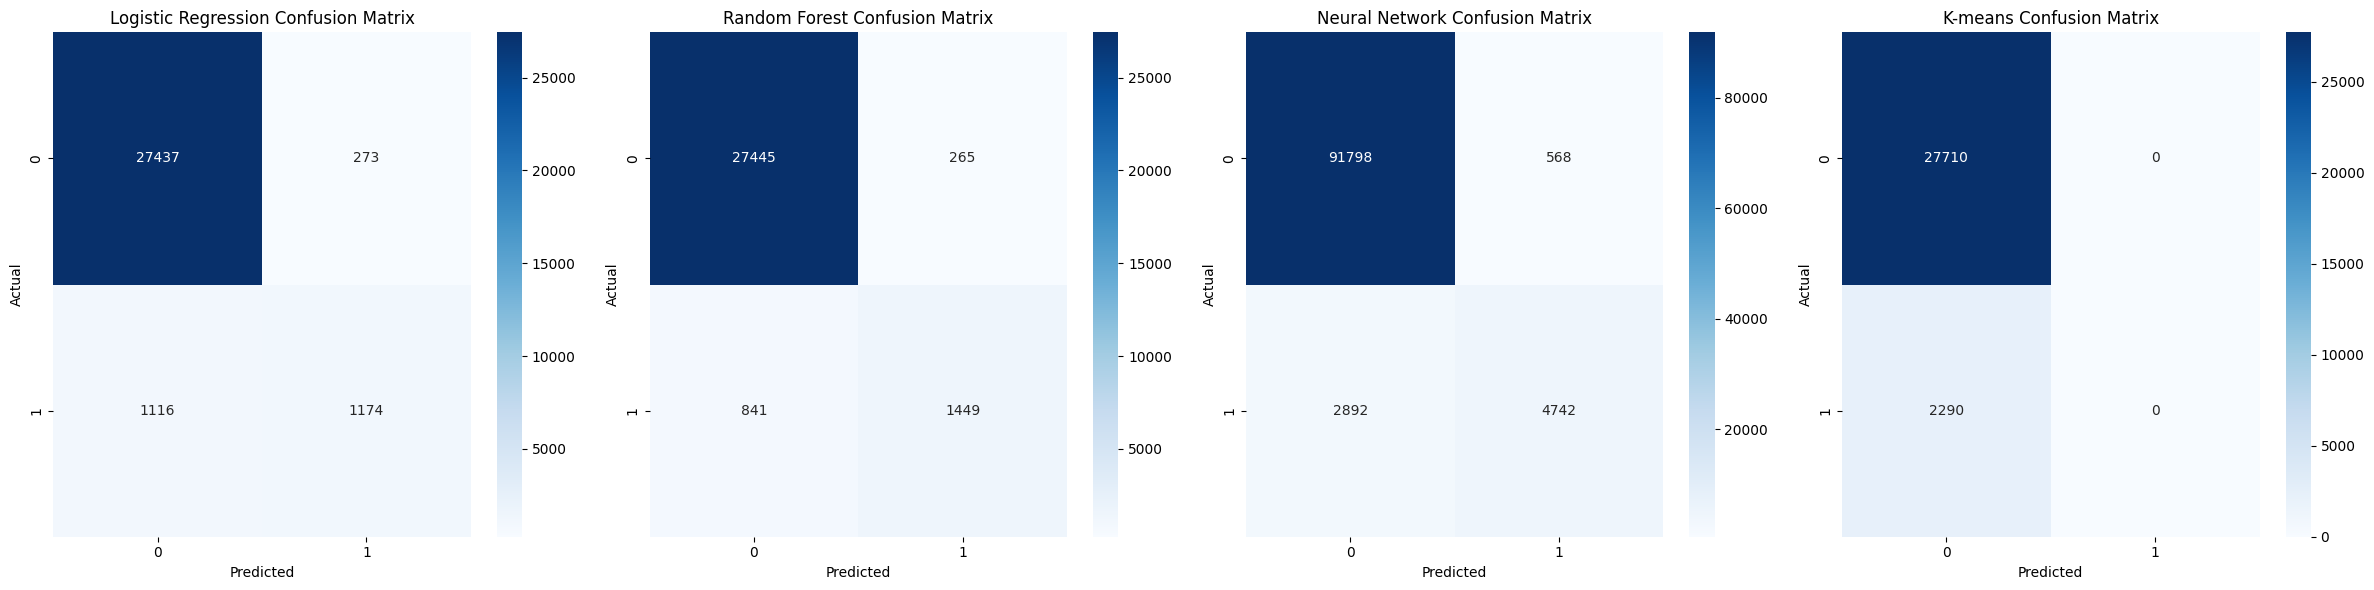

In [24]:
model_names = ['Logistic Regression', 'Random Forest', 'Neural Network', 'K-means']
confusion_matrices = [conf_matrix_lr, conf_matrix_rf, conf_matrix_nn, conf_matrix_ul]

# Plot confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
for i, ax in enumerate(axes):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_names[i]} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

#precission and recall comparison

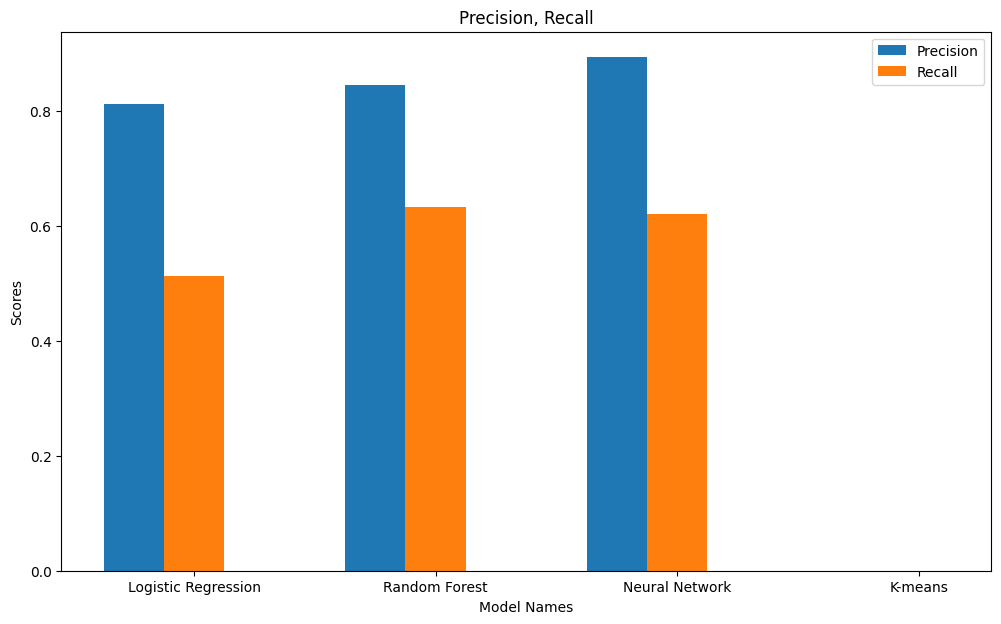

In [25]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'Random Forest', 'Neural Network', 'K-means']
precision_scores = [precision_lr, precision_rf, precision_nn, precision_ul]
recall_scores = [recall_lr, recall_rf, recall_nn, recall_ul]

x = range(len(model_names))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 7))

# Bars
rects1 = ax1.bar([i - width for i in x], precision_scores, width, label='Precision')
rects2 = ax1.bar(x, recall_scores, width, label='Recall')

# Labels and title
ax1.set_xlabel('Model Names')
ax1.set_ylabel('Scores')
ax1.set_title('Precision, Recall')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()